<img src='../../images/course_logo_2024.jpg'/>

<div dir="rtl">
    <h1 style="text-align: center;"> תירגול 3 ריגרסיה לינארית ולוגיסטית</h1>
    <h1 style="text-align: center;"> Ex 3 Linear/Logistic Regression</h1>
    <p> Based on Matan Mor Exercise and <a hrfe=https://www.coursera.org/specializations/machine-learning-introduction> Andrew NG Machine Learning Course</a></p>
</div>

# Exercise outline
1. Regression Vs. Classification
2. Linear Regression
3. Lost and cost function
4. Gradient Decent
5. PyTorch
6. Logistic Regression


# 1.Regression Vs. Classification

<img src="../../images/classificationvsregression.png"/>

# Linear Regression

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({'area_sq_feet': [852, 1416, 2104, 1534], 'price_in_thousands' : [178, 232, 460, 315]})

In [52]:
df.sort_values(by='price_in_thousands')

,area_sq_feet,price_in_thousands
0,852,178
1,1416,232
3,1534,315
2,2104,460


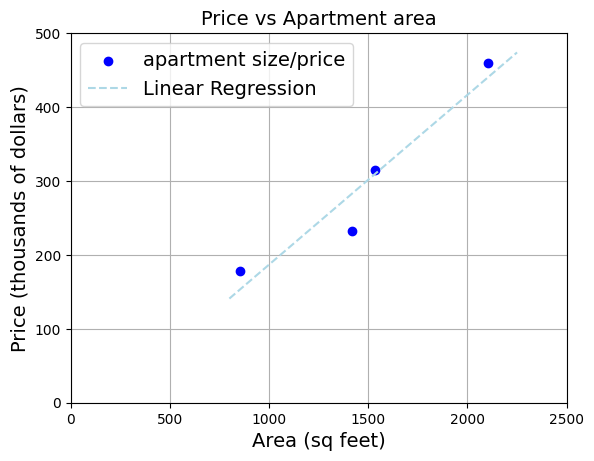

In [95]:
# Create the scatter plot
x = df[['area_sq_feet']].values
y = df[['price_in_thousands']].values

X = np.hstack((x, np.ones((x.shape[0],1))))
reg = LinearRegression().fit(X, y)

plt.scatter(x, y, color='blue', marker='o', label='apartment size/price')

# Show grid
plt.grid(True)

# Set labels and title
plt.xlabel('Area (sq feet)', fontsize=14)
plt.ylabel('Price (thousands of dollars)', fontsize=14)
plt.title('Price vs Apartment area', fontsize=14)

x1 = 800
x2 = 2250
y1 = reg.predict(np.array([[x1, 1]]))[0][0]
y2 = reg.predict(np.array([[x2, 1]]))[0][0]

plt.plot([x1, x2], [y1, y2], color='lightblue', linestyle='--', label='Linear Regression')


# Set x/y-axis limits
plt.xlim(0, 2500)
plt.ylim(0, 500)


# Show legend (optional, if you have a label in the scatter plot)
plt.legend(fontsize=14, loc='upper left')

# Show the plot
plt.show()

In [91]:
reg.predict(np.array([[800, 0]]))[0][0]

140.91233971947196

<p>Diagram based on <a herf="https://www.youtube.com/watch?app=desktop&v=3vNvwIxTHIM">https://www.youtube.com/watch?app=desktop&v=3vNvwIxTHIM</a></p>
<div align='center'><img width =800 src='../../images/data_science_process.jpg'/></div>

# 2. Using ChatGPT with QGIS

We have 2 main options:

1. Run along with ChatGPT, Bard, Copilot
2. Use the plugin (I less recommend this option)

Example queries:

1. Select and zoom for the selected feature, concerning the selected layer in QGIS
2. Get values from the selected features, for a specific field concerning a selected layer
3. Filter on the selected layer where a given field is equal to the value on the selected layer and given field




# 3. Data Preparation and Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


In [ ]:
df = pd.read_csv('real_estate_tlv.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
# overwrite the columns translate to english
df.columns = ['date', 'block_parcel', 'description', 'rooms' ,'floor', 'area_sqm', 'price']

In [ ]:
df.head()

In [ ]:
# Deal with Date
df['date'].head()

In [ ]:
pd.to_datetime(df['date'], format="%d.%m.%Y").head()

In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y")

In [ ]:
# Dealing with block parcel

In [ ]:
df['block_parcel'].head(25)

In [ ]:
# we can deal with '-' and '/' separately
df['block_parcel'].apply(lambda p: '-' in p)

In [ ]:
q1 = df['block_parcel'].apply(lambda p: '-' in p)
q2 = df['block_parcel'].apply(lambda p: '/' in p)

In [ ]:
q1.sum()

In [ ]:
q2.sum()

In [ ]:
df.loc[q1, 'block_parcel'].head()

In [ ]:
df.loc[q2, 'block_parcel'].head()

In [ ]:
df.loc[q1, 'block_parcel'].apply(lambda p: pd.Series(index=['block', 'parcel', 'sub_parcel'], data = p.split('-')))

In [ ]:
df.loc[q1, ['block', 'parcel', 'sub_parcel']] = df.loc[q1, 'block_parcel'].apply(\
        lambda p: pd.Series(index=['block', 'parcel', 'sub_parcel'], \
                    data = [int(item) for item in p.split('-')]))

In [ ]:
df.head()

In [ ]:
df.loc[q2, ['block', 'parcel', 'sub_parcel']] = df.loc[q2, 'block_parcel'].apply(\
            lambda p: pd.Series(index=['block', 'parcel', 'sub_parcel'], \
                        data = [int(item) for item in p.split('/')][::-1]))

In [ ]:
df.head()

In [ ]:
# Description

In [ ]:
df['description'].value_counts()

In [ ]:
df['description'].apply(lambda p: str(p).strip()).value_counts()

In [ ]:
df['description_'] = df['description'].apply(lambda p: str(p).strip())

In [ ]:
df['description_'].unique()

In [ ]:
df[df['description_'] == 'nan']

In [ ]:
df.loc[df['description_'] == 'nan', 'description_'] = 'Unknown'

In [ ]:
df[df['description_'] == 'Unknown']

In [ ]:
df['floor'].value_counts()

In [ ]:
df['floor'].value_counts().to_frame().reset_index()

In [ ]:
translate_floor = df['floor'].value_counts().to_frame().reset_index()

In [ ]:
translate_floor['floor_cat'] = translate_floor['floor'].apply(lambda p: 'Unknown' if '-' in p else np.nan)

In [ ]:
translate_floor

In [ ]:
translate_floor_dict = {'ראשונה' : 'floor_1',
 'שלישית' : 'floor_3',
 'שניה'   : 'floor_2',
 'רביעית' : 'floor_4',
 'קרקע'   : 'ground',
 'חמישית' : 'floor_5',
 'קומה 5' : 'floor_5',
 'קומה 1' : 'floor_1',
 'קומה 4' : 'floor_4',
 'קומה 3' : 'floor_3',
 'מרתף'   : 'basement',
 'קומה 0' : 'ground',
 'קרקע ובניים': 'ground_floor_1',
 'רביעית וגג' :'floor_4_roof',
 'עשרים ושמונה': 'floor_28',
 'מרתף,קרקע': 'ground_basement',
 'שמינית': 'floor_8',
 'קומה 6': 'floor_6',
 'שישית': 'floor_6',
 'חמש עשרה': 'floor_15',
 'עשרים ושלוש': 'floor_23',
 'עשרים': 'floor_20',
 'אחת עשרה': 'floor_11', 
 'אח עשרה': 'floor_11',
 'ארבעים': 'floor_40',
 'שלישית, רביעית': 'floor_3_floor_4',
 'עמודים': 'floor_1',
 'ביניים': 'floor_1',
'שלישית+רביעית': 'floor_3_floor_4',
 'שתים עשרה,שלש עשרה': 'floor_12_floor_13',
 'חמישית, שישית': 'floor_5_floor_6',
 'שמונה עשרה': 'floor_18',
 'מרתף חמישי, קרקע': 'basement_floor_5_ground',
 'רביעית וחמישית': 'floor_4_floor_5'}

In [ ]:
translate_floor.loc[translate_floor['floor_cat'].isna(),'floor_eng'] = translate_floor.loc[translate_floor['floor_cat'].isna(),'floor'].apply(lambda p: translate_floor_dict.get(p))

In [ ]:
translate_floor.head()

In [ ]:
{f'floor_{i}': i for i in range(0, 41)}

In [ ]:
floor_to_number_dict = {f'floor_{i}': i for i in range(0, 41)}
floor_to_number_dict.update({'ground': 0, 'basement': -1, })

In [ ]:
floor_to_number_dict

In [ ]:
translate_floor['floor_number'] = translate_floor['floor_eng'].apply(lambda p: floor_to_number_dict.get(p, np.nan))

In [ ]:
translate_floor.head()

In [ ]:
translate_floor

In [ ]:
translate_floor[translate_floor['floor_number'].notna()][['floor','floor_number']].set_index('floor').to_dict()['floor_number']

In [ ]:
floor_heb_to_number_dict = translate_floor[translate_floor['floor_number'].notna()][['floor','floor_number']].set_index('floor').to_dict()['floor_number']

In [ ]:
floor_heb_to_number_dict['שמונה עשרה']

In [ ]:
df.loc[df['floor'].notna(), 'floor_number'] = df.loc[df['floor'].notna(), 'floor'].apply(lambda p: floor_heb_to_number_dict.get(p.strip()))

In [ ]:
df.head()

In [ ]:
df['price'] = df['price'].apply(lambda p: p.replace('₪','').replace(',','')).astype(float)

In [ ]:
df.head()

In [ ]:
df = df.drop(columns = ['block_parcel', 'description', 'floor'])

In [ ]:
df.info()

In [ ]:
df[df['floor_number'].notna()].info()

In [ ]:
df = df[df['floor_number'].notna() & df['area_sqm'].notna()].reset_index(drop = True)

In [ ]:
df.info()

In [ ]:
df.head()

# 4. Data Exploration and Analysis (EDA)

1. Is the data distributed normally?
2. Do I have outliers?
3. Is the area_sqm correleated to the price?
4. Is there a geographic correlation?
5. Do I have other correlations?



In [ ]:
df.describe(include = np.number)

In [ ]:
df.describe(include = ['O'])

In [ ]:
df.price.hist()

In [ ]:
df.price.apply(lambda p: np.log(p)+1).hist(bins=20)

In [ ]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df['price'].apply(lambda p: np.log(p)+1))

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df['price'].apply(lambda p: np.log(p)+1), nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density')

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df['price'].apply(lambda p: np.log(p)+1).min(), df['price'].apply(lambda p: np.log(p)+1).max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="Price Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    height=400,
    width=1200
)
fig.show()

## Outliers

In [ ]:
plt.scatter(x=df['area_sqm'], y=df['price'])

In [ ]:
plt.scatter(x=df['floor_number'], y=df['price'])

In [ ]:
plt.scatter(x=df['rooms'], y=df['price'])

In [ ]:
df = df[df['price'] < df['price'].max()].reset_index(drop = True)

## correlations

In [ ]:
plt.scatter(x=df['area_sqm'], y=df['price'])

In [ ]:
plt.scatter(x=df['floor_number'], y=df['price'])

In [ ]:
plt.scatter(x=df['rooms'], y=df['price'])

In [ ]:
df.price.hist()

In [ ]:
df.price.apply(lambda p: np.log(p)+1).hist(bins=20)

In [ ]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df['price'].apply(lambda p: np.log(p)+1))

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df['price'].apply(lambda p: np.log(p)+1), nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density')

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df['price'].apply(lambda p: np.log(p)+1).min(), df['price'].apply(lambda p: np.log(p)+1).max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="Price Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    height=400,
    width=1200
)
fig.show(renderer='colab')


In [ ]:
df['ppm'] = (df['price']/ df['area_sqm'])

In [ ]:
plt.scatter(x=df['date'], y=df['ppm'])

In [ ]:
df.corr(numeric_only = True)

In [ ]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap='coolwarm')
plt.show()

## Geographic correlcation?

In [ ]:
df['block_parcel'] = df.apply(lambda p: f"{p['block']:.0f}_{p['parcel']:.0f}", axis=1)

In [ ]:
df.head()

In [ ]:
df['block_parcel'].nunique()

In [ ]:
df['block_parcel'].value_counts()

In [ ]:
df['block'].nunique()

In [ ]:
df['block'].value_counts()

In [ ]:
df['block'].value_counts().head(15)

In [ ]:
df['block'].value_counts().head(15).index

In [ ]:
selected_blocks = df[df['block'].isin([7226.0, 6933.0, 6911.0, 6907.0, 6909.0, 6936.0, 7451.0, 6904.0, 7460.0,
       7429.0, 6941.0, 7430.0, 6910.0, 7085.0, 6937.0])].copy()

In [ ]:
selected_blocks

## Exploring the Categorical Fields

In [ ]:
selected_blocks['block'] = selected_blocks['block'].astype(int).astype(str).astype('category')

In [ ]:
plt.figure(figsize=(12,6))
fig = plt.scatter(x=selected_blocks['block'], y=selected_blocks['ppm'])

In [ ]:
fig = px.box(selected_blocks, x='block', y='ppm', template='plotly_white', height=600)
fig.show(renderer='colab')


In [ ]:
df

In [ ]:
df['description_'].value_counts().to_frame()

In [ ]:
df.groupby(['description_','rooms']).agg({'date':'count', 'price':'mean', 'ppm':'mean'})

In [ ]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [ ]:
group_by_description = df.groupby(['description_','rooms']).agg({'date':'count', 'price':'mean', 'ppm':'mean'})

In [ ]:
group_by_description.reset_index(inplace=True)

In [ ]:
group_by_description

In [ ]:
group_by_description.rename(columns={'date':'count'}, inplace=True)

In [ ]:
fig = px.bar(group_by_description, x='rooms', y='price', color='description_', barmode='group', template='plotly_white', width=1200)
fig.update_layout(bargap = 0.1 )
fig.show(renderer='colab')


In [ ]:
fig = px.bar(group_by_description, x='rooms', y='ppm', color='description_', barmode='group', template='plotly_white', width=1000)
fig.update_layout(bargap = 0.1 )
fig.show(renderer='colab')


# 5. Widgets simple exploration tool

In [ ]:
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox

layout = widgets.Layout(width='auto') #set width and height


In [ ]:
list_of_columns = df.columns
x_col_widget = widgets.Dropdown(
    options=list_of_columns,
    description='X column:',
    value = list_of_columns[1],
    disabled=False,
    style = {'description_width': 'initial'}
)
y_col_widget = widgets.Dropdown(
    options=list_of_columns,
    description='Y column:',
    value = list_of_columns[2],
    disabled=False,
    style = {'description_width': 'initial'}
)
color_group_widget = widgets.Dropdown(
    options=list_of_columns,
    description='Color Column Group:',
    value = list_of_columns[3],
    disabled=False,
    style = {'description_width': 'initial'}
)
top_values_widget = widgets.Dropdown(
    options=[str(i) for i in range(15)],
    description='Choose Number of top values by count:',
    value = '2',
    disabled=False,
    style = {'description_width': 'initial'}
)
type_of_graph_widget = widgets.Dropdown(
    options=['scatter','bar'],
    description='Choose Graph:',
    value = 'bar',
    disabled=False,
    style = {'description_width': 'initial'}
)
color_scale_widget = widgets.Dropdown(
    options=px.colors.named_colorscales(),
    description='Color sclae name:',
    value = 'bupu',
    disabled=False,
    style = {'description_width': 'initial'}
)


In [ ]:
HBox1 = HBox([x_col_widget,y_col_widget,color_group_widget])
HBox2 = HBox([top_values_widget,type_of_graph_widget,color_scale_widget])
VBox([HBox1,HBox2])



In [ ]:
x_data = x_col_widget.value
y_data = y_col_widget.value

color_data = color_group_widget.value
color_scale = color_scale_widget.value
top_cat = int(top_values_widget.value)


filter_values = df[color_data].value_counts().index[0:top_cat]
subset = df[df[color_data].isin(filter_values)].copy()

if (type_of_graph_widget.value=='scatter'):
    fig = px.scatter(subset, x=x_data, y=y_data, color=color_data, color_continuous_scale = color_scale)
    fig.update_layout(width = 1200)
    fig.show(renderer='colab')

else:
    fig = px.bar(subset, x=x_data, y=y_data, color=color_data,color_continuous_scale=color_scale)
    fig.show(renderer='colab')


## Graphing examples

https://plotly.com/python/

https://seaborn.pydata.org/examples/index.html

## Further Reading:

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview